In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls "/content/gdrive/My Drive/733 Project Files/training result"

regular_small  tiny_full2  tiny_small  visual_test_custom


In [ ]:
gdrive_save_location = "/content/gdrive/My Drive/733 Project Files/training result"

# Download YOLO code and weights

In [ ]:
import sys
import torch
from google.colab import drive
import glob


print(f"Python version: {sys.version}, {sys.version_info} ")
print(f"Pytorch version: {torch.__version__} ")

Python version: 3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0], sys.version_info(major=3, minor=9, micro=16, releaselevel='final', serial=0) 
Pytorch version: 1.13.1+cu116 


In [1]:
!# Download YOLOv7 code
!git clone https://github.com/WongKinYiu/yolov7
%cd yolov7
!ls

Cloning into 'yolov7'...
remote: Enumerating objects: 1139, done.
remote: Total 1139 (delta 0), reused 0 (delta 0), pack-reused 1139
Receiving objects: 100% (1139/1139), 70.31 MiB | 25.63 MiB/s, done.
Resolving deltas: 100% (514/514), done.
/content/yolov7
cfg	detect.py  hubconf.py  models	  requirements.txt  tools	  utils
data	export.py  inference   paper	  scripts	    train_aux.py
deploy	figure	   LICENSE.md  README.md  test.py	    train.py


In [ ]:
!# Download trained weights
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-tiny.pt
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt

In [ ]:
# download test images (official coco test images, ignore)
#!gdown 1LduALiAiIoaN-6Gz-wyq-xI2pKyBi3ES
#!unzip -o test_images.zip -d /content/test_images

# Transfer learning on udacity

Details: https://learnopencv.com/fine-tuning-yolov7-on-custom-dataset/

In [ ]:
!pwd

/content/yolov7


### download udacity dataset: full and small

In [ ]:
# download udacity dataset
!gdown 1eA8A7Ol-MzAoZO1SzGvDHEkNimDcn_gK
!unzip -o udacity.zip -d udacity_test

In [ ]:
# rename folder and move cfg files

!mv udacity_test/udacity udacity
!rm -r udacity_test

!mv udacity/udacity.yaml data/udacity.yaml
!mv udacity/yolov7-tiny-udacity.yaml cfg/training/yolov7-tiny-udacity.yaml
!mv udacity/yolov7-udacity.yaml cfg/training/yolov7-udacity.yaml

In [ ]:
# download udacity-small dataset
!gdown 1JWJO0f-0FiPOazT43wcDVN5jSPUXY1Th
!unzip -o udacity_small.zip -d udacity_small_test

In [ ]:
!mv udacity_small_test/udacity_small udacity_small
!rm -r udacity_small_test

!mv udacity_small/udacity_small.yaml data/udacity_small.yaml
!mv udacity_small/yolov7-tiny-udacity.yaml cfg/training/yolov7-tiny-udacity.yaml # same as full set
!mv udacity_small/yolov7-udacity.yaml cfg/training/yolov7-udacity.yaml # same as full set

In [ ]:
!cp "{gdrive_save_location}/tiny_full2/tiny_full2/weights/best.pt" tiny_full.pt

### learning: small udacity, tiny weight

In [ ]:
# transfer learning on udacity data
save_dir = "tiny_small" # result save dir
data_cfg = "data/udacity_small.yaml" # data.yaml
training_cfg = "cfg/training/yolov7-tiny-udacity.yaml" # yolo-tiny cfg
weight = 'yolov7-tiny.pt' # weight name
nepochs = 100

!python train.py --epochs {nepochs} --workers 4 --device 0 --batch-size 32 \
--data {data_cfg} --img 640 640 --cfg {training_cfg} \
--weights {weight} --name {save_dir} --hyp data/hyp.scratch.tiny.yaml

YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15101.8125MB)

Namespace(weights='yolov7-tiny.pt', cfg='cfg/training/yolov7-tiny-udacity.yaml', data='data/udacity_small.yaml', hyp='data/hyp.scratch.tiny.yaml', epochs=100, batch_size=32, img_size=[640, 640], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=False, image_weights=False, device='0', multi_scale=False, single_cls=False, adam=False, sync_bn=False, local_rank=-1, workers=4, project='runs/train', entity=None, name='tiny_small', exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias='latest', freeze=[0], v5_metric=False, world_size=1, global_rank=-1, save_dir='runs/train/tiny_small', total_batch_size=32)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2023-03-29 02:57:58.082206: I tensorflow/core/platform/cpu_feature_guard.cc:193]

In [ ]:
_gdrive_save = f"{gdrive_save_location}/{save_dir}"
_result = f"runs/train/{save_dir}"
!cp -r {_result} "{_gdrive_save }"

### learning: small udacity, regular weight

In [ ]:
import torch
torch.cuda.empty_cache()
import gc
gc.collect()

0

In [ ]:
# transfer learning on udacity data

save_dir = "regular_small" # you need this for test
data_cfg = "data/udacity_small.yaml"
training_cfg = "yolov7-udacity.yaml"
weight = 'yolov7.pt' # weight name
nepochs = 100

!python train.py --epochs {nepochs} --workers 4 --device 0 --batch-size 16 \
--data {data_cfg} --img 640 640 --cfg {training_cfg} \
--weights {weight} --name {save_dir} --hyp data/hyp.scratch.tiny.yaml

YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15101.8125MB)

Namespace(weights='yolov7.pt', cfg='./cfg/training/yolov7-udacity.yaml', data='data/udacity_small.yaml', hyp='data/hyp.scratch.tiny.yaml', epochs=100, batch_size=16, img_size=[640, 640], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=False, image_weights=False, device='0', multi_scale=False, single_cls=False, adam=False, sync_bn=False, local_rank=-1, workers=4, project='runs/train', entity=None, name='regular_small', exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias='latest', freeze=[0], v5_metric=False, world_size=1, global_rank=-1, save_dir='runs/train/regular_small5', total_batch_size=16)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2023-03-29 04:40:40.406150: I tensorflow/core/platform/cpu_feature_guard.cc:193] 

In [ ]:
_gdrive_save = f"{gdrive_save_location}/{save_dir}"
_result = f"runs/train/{save_dir}"
!cp -r {_result} "{_gdrive_save }"

In [ ]:
# results are split
for idx in range(2, 6):
  _gdrive_save = f"{gdrive_save_location}/{save_dir}{idx}"
  _result = f"runs/train/{save_dir}{idx}"
  !cp -r {_result} "{_gdrive_save}"

### learning: full udacity, tiny weight

In [ ]:
import torch
torch.cuda.empty_cache()
import gc
gc.collect()

0

In [ ]:
# transfer learning on udacity data -- resume

save_dir = "tiny_full2" # you need this for test
data_cfg = "data/udacity.yaml"
training_cfg = "cfg/training/yolov7-tiny-udacity.yaml"
weight = 'yolov7-tiny.pt' # weight name
nepochs = 100

!python train.py --epochs {nepochs} --workers 4 --device 0 --batch-size 32 \
--data {data_cfg} --img 640 640 --cfg {training_cfg} \
--resume "runs/training/tiny_full/weights/tiny_full.pt" --name {save_dir} --hyp data/hyp.scratch.tiny.yaml \
--gdrive "{gdrive_save_location}"

Resuming training from runs/training/tiny_full/weights/tiny_full.pt
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15101.8125MB)

Namespace(weights='runs/training/tiny_full/weights/tiny_full.pt', cfg='', data='data/udacity.yaml', hyp='data/hyp.scratch.tiny.yaml', epochs=100, batch_size=32, img_size=[640, 640], rect=False, resume=True, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=False, image_weights=False, device='0', multi_scale=False, single_cls=False, adam=False, sync_bn=False, local_rank=-1, workers=4, project='runs/train', entity=None, name='tiny_full', exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias='latest', freeze=[0], v5_metric=False, gdrive='/content/gdrive/My Drive/733 Project Files/training result', world_size=1, global_rank=-1, save_dir='runs/train/tiny_full2', total_batch_size=32)
tensorboard: Start with 'tensorboard --logdir ru

In [ ]:
# transfer learning on udacity data

save_dir = "tiny_full" # you need this for test
data_cfg = "data/udacity.yaml"
training_cfg = "cfg/training/yolov7-tiny-udacity.yaml"
weight = 'yolov7-tiny.pt' # weight name
nepochs = 100

!python train.py --epochs {nepochs} --workers 4 --device 0 --batch-size 32 \
--data {data_cfg} --img 640 640 --cfg {training_cfg} \
--weights {weight} --name {save_dir} --hyp data/hyp.scratch.tiny.yaml \
--gdrive "{gdrive_save_location}"

YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15101.8125MB)

Namespace(weights='yolov7-tiny.pt', cfg='cfg/training/yolov7-tiny-udacity.yaml', data='data/udacity.yaml', hyp='data/hyp.scratch.tiny.yaml', epochs=100, batch_size=32, img_size=[640, 640], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=False, image_weights=False, device='0', multi_scale=False, single_cls=False, adam=False, sync_bn=False, local_rank=-1, workers=4, project='runs/train', entity=None, name='tiny_full', exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias='latest', freeze=[0], v5_metric=False, gdrive='/content/gdrive/My Drive/733 Project Files/training result', world_size=1, global_rank=-1, save_dir='runs/train/tiny_full2', total_batch_size=32)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2023-03-29 17:21:1

In [ ]:
gdrive_save_location

'/content/gdrive/My Drive/733 Project Files/training result'

### learning: full udacity, regular weight

In [ ]:
import torch
torch.cuda.empty_cache()
import gc
gc.collect()

In [ ]:
# transfer learning on udacity data

save_dir = "regular_full" # you need this for test
data_cfg = "data/udacity.yaml"
training_cfg = "cfg/training/yolov7-udacity.yaml"
weight = 'yolov7.pt'
nepochs = 100

!python train.py --epochs {nepochs} --workers 4 --device 0 --batch-size 16 \
--data {data_cfg} --img 640 640 --cfg {training_cfg} \
--weights {weight} --name {save_dir} --hyp data/hyp.scratch.tiny.yaml

In [ ]:
_result = f"runs/train/{save_dir}"
for _folder in glob.glob(f"{_result}*"):
  _t = f'{gdrive_save_location}/{_folder.split("/")[-1]}'
  !cp -r {_folder} "{_t}"

### visualize model

In [ ]:
from torchviz import make_dot

make_dot(yhat, params=dict(list(model.named_parameters()))).render("rnn_torchviz", format="png")

# Test on Udacity dataset

In [ ]:
!python test.py --weights runs/train/yolov7_tiny_udacity_fixed_res/weights/best.pt \
--task test --data data/udacity.yaml

In [ ]:
# small dataset
save_dir = "yolov7_tiny_udacity_small_fixed_res" # you need this for test
data_cfg = "data/udacity_small.yaml"
training_cfg = "yolov7-tiny-udacity.yaml"

!python test.py --weights runs/train/yolov7_tiny_udacity_small_fixed_res/weights/best.pt \
--task test --data data/udacity_small.yaml

# Inference on cheap data

In [ ]:
# run inference for entire folder
# alternative 1 image: --source /path/to/file.jpg
# result stored to generated folders

!python detect.py --weights ./yolov7-tiny.pt --conf 0.25 --img-size 640 --source /content/test_images/test_images/

In [ ]:
import glob

In [ ]:
predicted_imgs = glob.glob('/content/yolov7/runs/detect/exp3/*.*')

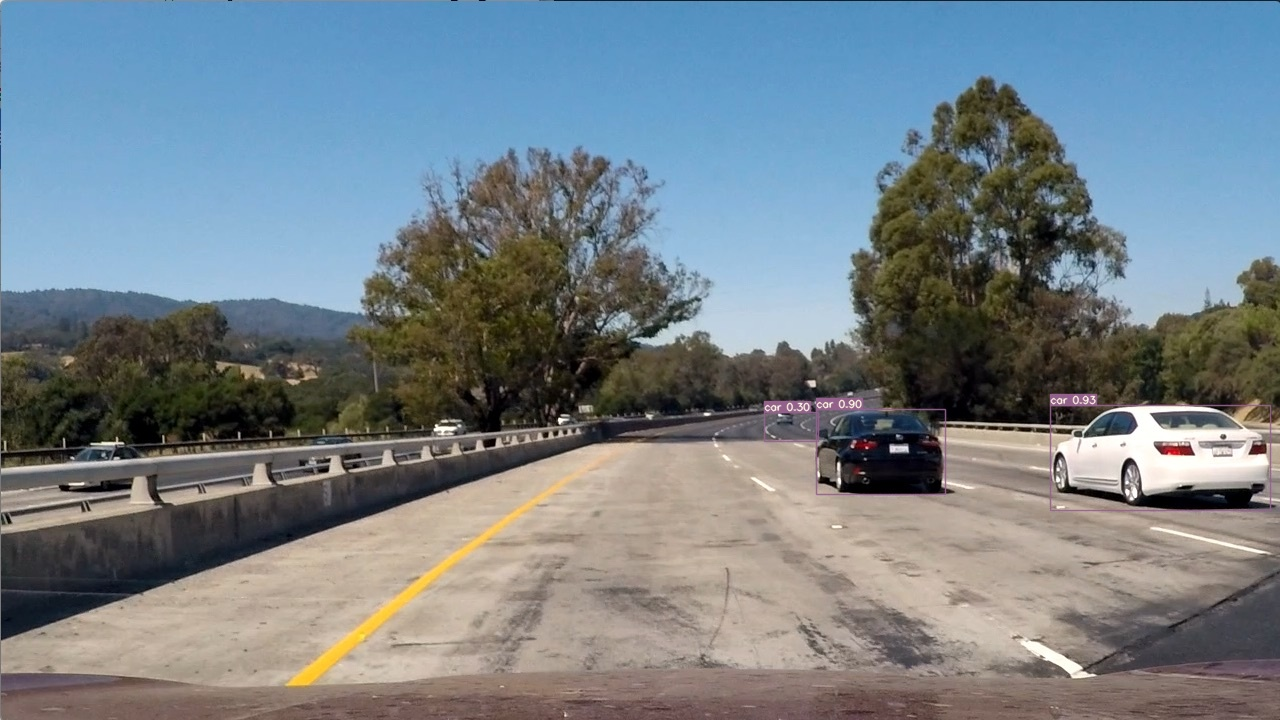

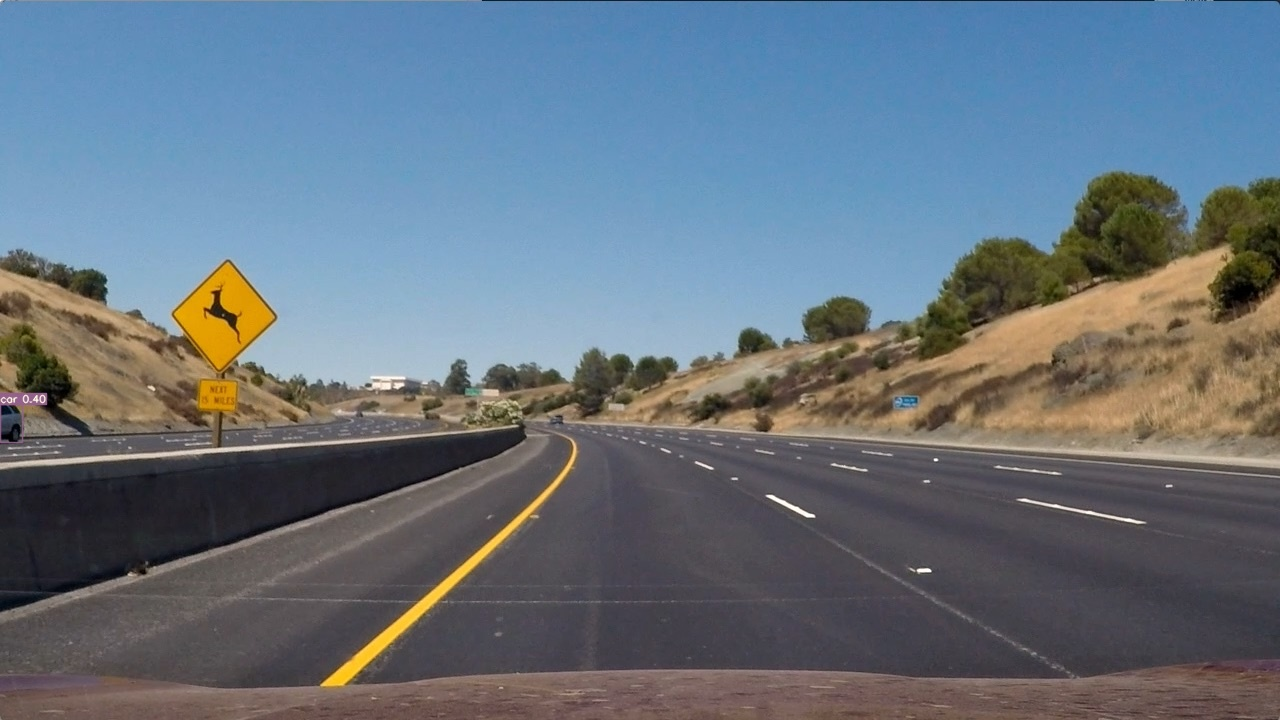

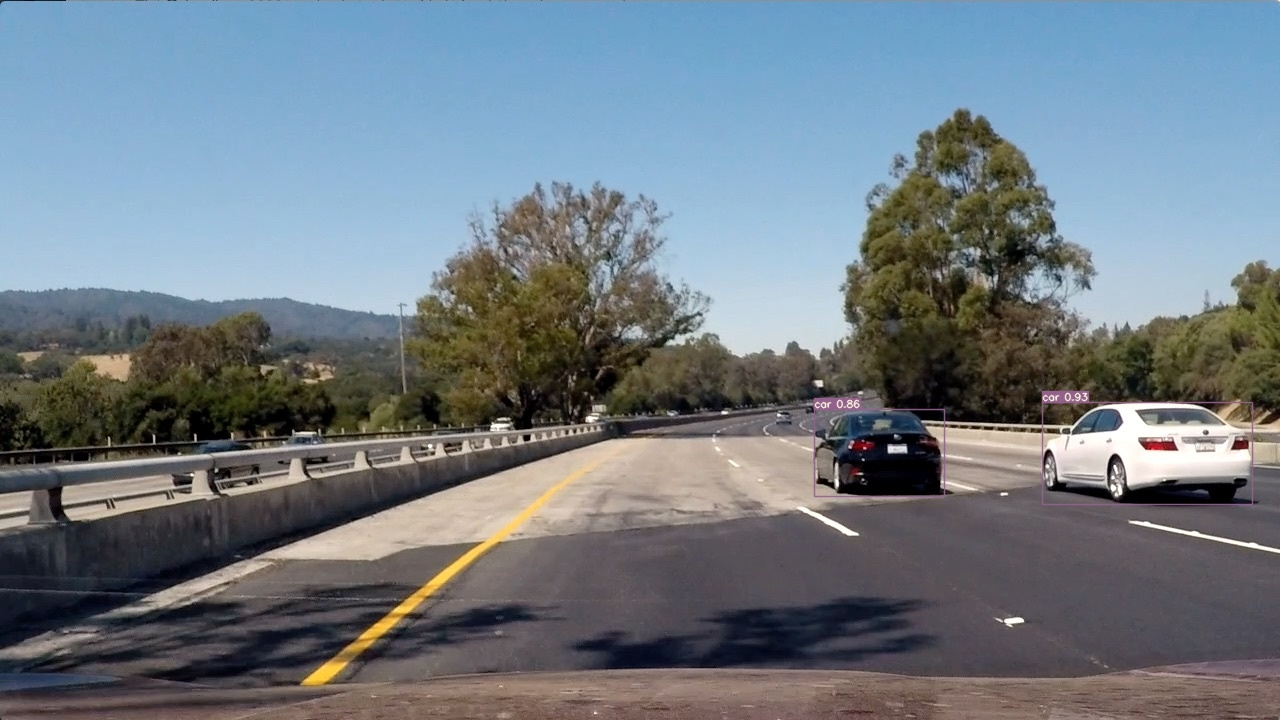

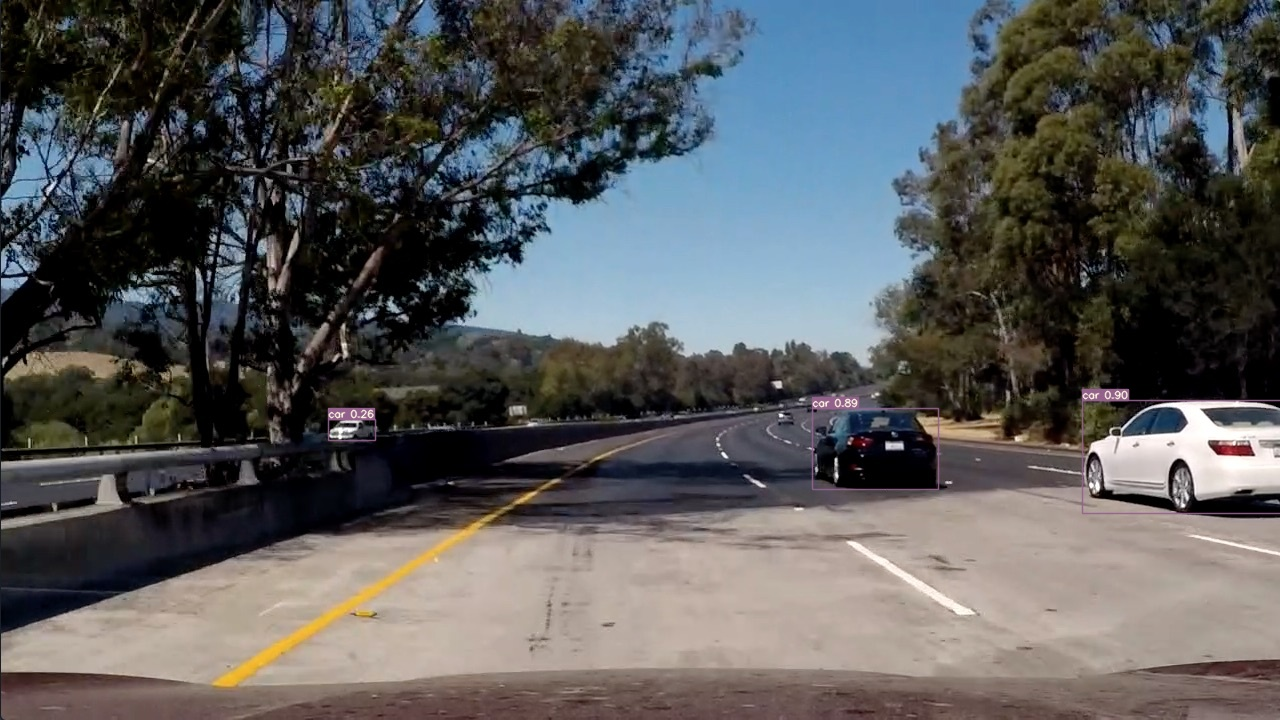

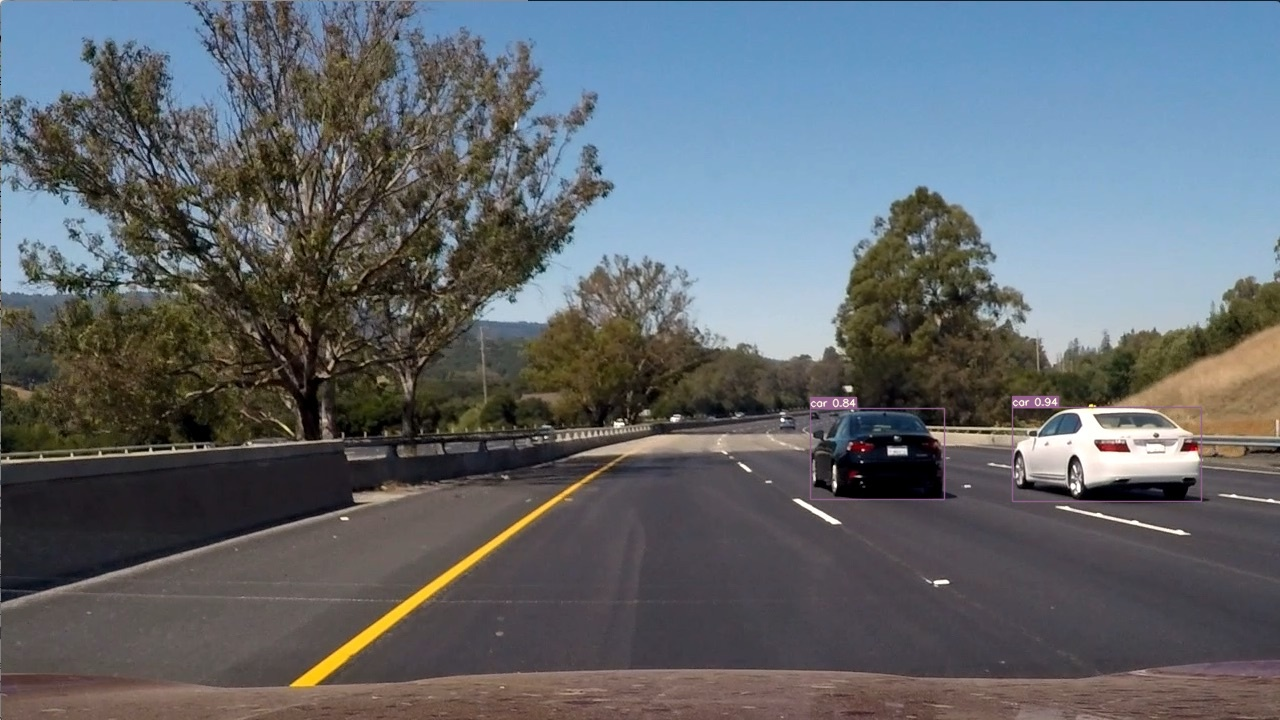

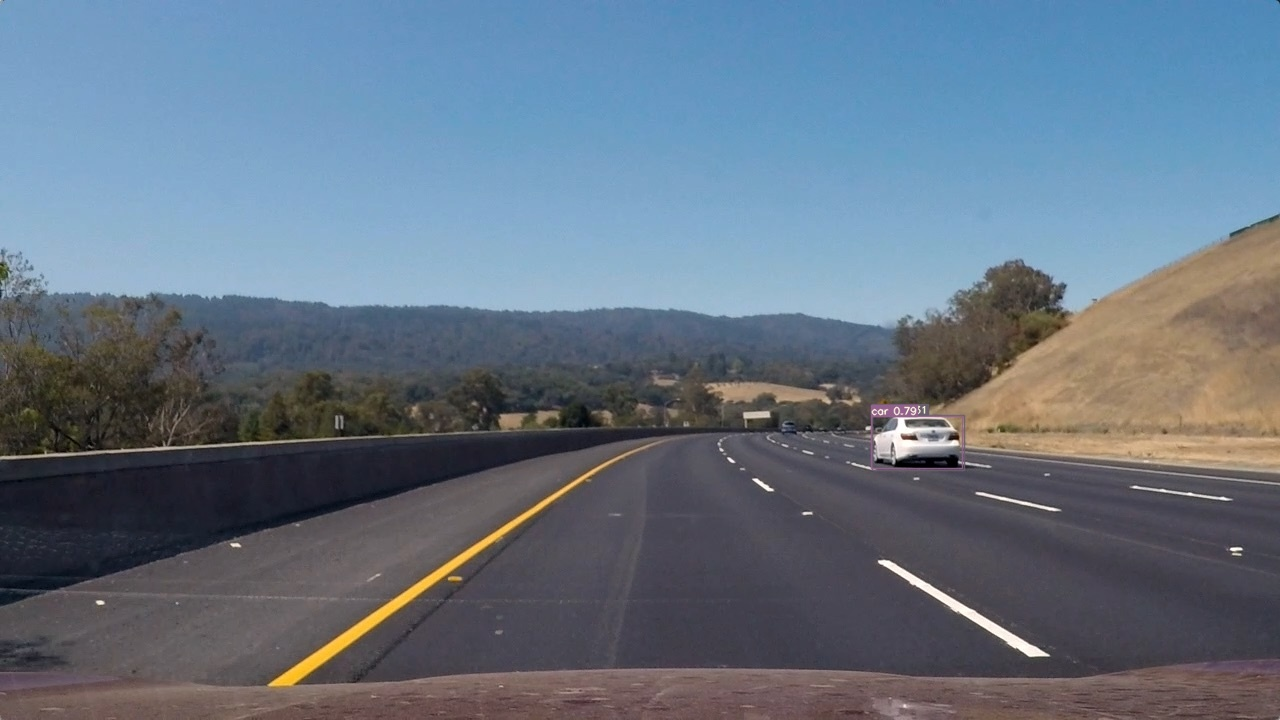

In [ ]:
from IPython.display import Image
from IPython.display import display

arr = [Image(_) for _ in predicted_imgs]

display(*arr)

In [ ]:
predicted_imgs

[]

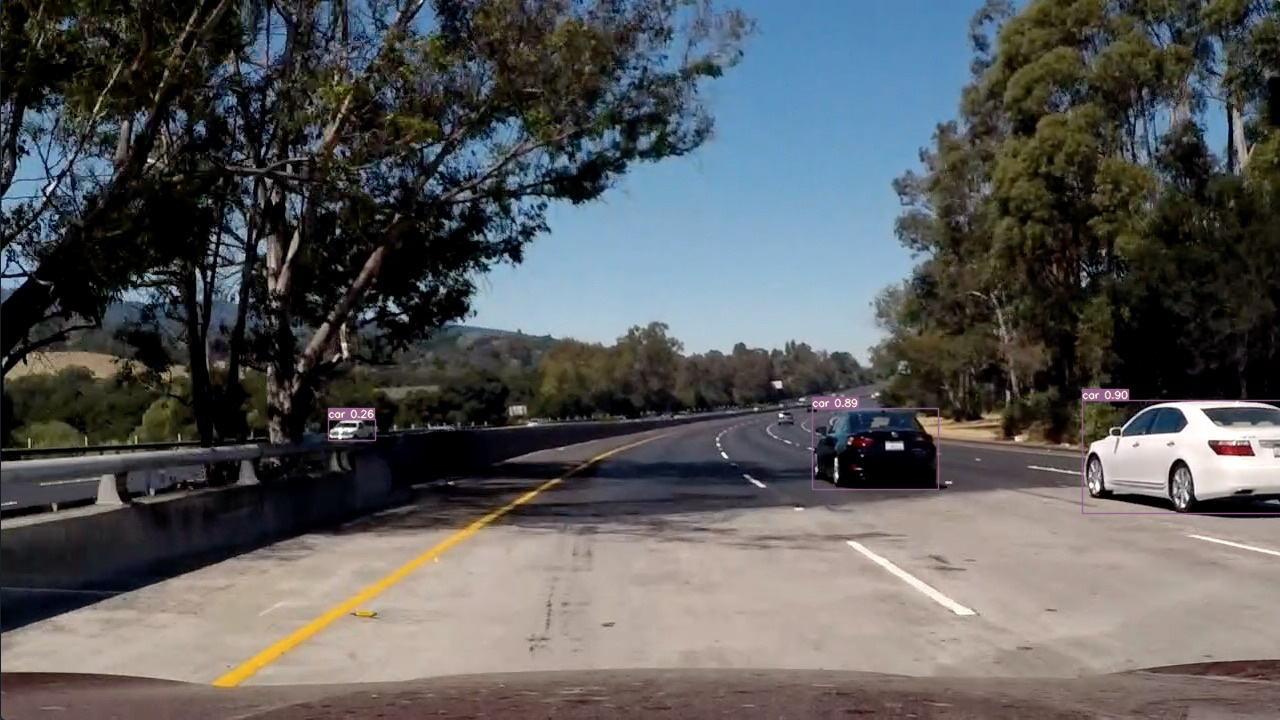

In [ ]:
from PIL import Image
 
Image.open('/content/yolov7/runs/detect/exp3/test5.jpg')

In [ ]:
from pathlib import Path

In [ ]:
p = Path("/src/lib/bin/test/")

In [ ]:
p.name

'test'

In [ ]:
str(p)

'/src/lib/bin/test'